## **Analyzing "coaches"**

This dataset can be analyzed independently for dataset analysis purposes. The analysis will focus on examining the correlation between **win percentage and loss percentage**, and how these variables affect the likelihood of a **coach’s turnover**.

As stated in the _datasets_specification, the stint variable indicates a coach’s tenure status during a season:

- A stint value of 0 means the coach remained with the team for the entire season.
- A stint value of 1 means the coach was replaced or traded for another coach.
- A stint value of 2 means the coach was the second coach for that team during the season. This does not necessarily indicate that the coach was traded—only if the team had a third coach that season does it imply that the coach was traded.



### **Introduction to the Dataset**

This section provides a brief analysis of the dataset, highlighting its key metrics and characteristics. Additionally, it explores interesting variables to uncover patterns and insights.

In [9]:
import sys
import os
sys.path.append('..')

from data_scripts import _store_data as sd
from data_scripts import coaches_data as cd;
from pathlib import Path

sd.load_data(Path("../data"))
display(sd.df_info_table(sd.coaches_df))
display(cd.summarize_by_coach(sd.coaches_df))

,Non-Null Count,Null Count,Missing %,Dtype,Unique Values
coachID,162,0,0.0,object,57
year,162,0,0.0,int64,10
tmID,162,0,0.0,object,20
stint,162,0,0.0,int64,3
won,162,0,0.0,int64,29
lost,162,0,0.0,int64,28
post_wins,162,0,0.0,int64,8
post_losses,162,0,0.0,int64,6


,total_wins,total_losses,total_post_wins,total_post_losses,seasons,career_win_pct
coachID,,,,,,
coopemi01w,167,85,25,13,8,0.662698
donovan99w,145,138,12,14,9,0.512367
hugheda99w,145,155,12,17,9,0.483333
thibami99w,143,95,17,14,7,0.600840
chancva99w,140,92,10,11,7,0.603448
laimbbi01w,137,92,27,16,8,0.598253
adubari99w,116,102,11,12,8,0.532110
whisejo99w,85,54,19,10,5,0.611511
coylepa99w,81,90,6,10,6,0.473684


As shown in the **first table**, there are **no null or missing values** across any of the columns, indicating that the dataset is **clean** and does not require any preprocessing or correction. The dataset covers a **$10$-year period** and includes records for **$57$ coaches** managing **$20$ different teams**.

From the **second table**, we can observe that **coopemi01w** achieved the **highest total number of wins** with **$167$**, followed by **donovan99w** and **hugheda99w**, each with **$145$ wins**. The **top-performing coach** based on **career win percentage** was also **coopemi01w**, with an impressive **$66.3\%$ win rate** over **$8$ seasons**.

In terms of **postseason performance**, **laimbbi01w** stands out with **$27$ postseason wins**, the highest among all coaches, while maintaining a solid **overall win percentage** of **$59.8\%$**. Additionally, several coaches — such as **thibami99w** and **chancva99w** — demonstrated strong consistency, achieving **career win percentages above $60\%$**.

Overall, the data suggests a **high level of competitiveness** across the decade, with multiple coaches maintaining strong records both in **regular seasons** and the **postseason**.


### **Cleaning**

#### Dropping Columns with Unique Values

In [ ]:
del sd.coaches_df['lgID']

Since the `lgID` column contains only one unique value, it can be removed as it will not affect the analysis of the dataset.

### **EDA**

In [11]:
cd.turnovers_by_coach()

,coachID,total_turnovers
0,adubari99w,2
1,aglerbr99w,1
2,allenso99w,1
3,bibbyhe01w,1
4,bouceje01w,1
5,coopecy01w,1
6,coopemi01w,1
7,coylepa99w,1
8,dailesh99w,1
9,darscna99w,1


Based on this table, it appears that most coaches, if replaced, were replaced only once over the 10-year period, while only one coach experienced two turnovers.

#### Turnovers By Year

In [12]:
cd.get_turnover_years()


=== COACH TURNOVERS BY YEAR ===



,Year,Num Turnovers,Teams Affected,Turnover Rate
0,1,1,WAS,6.2%
1,2,2,"SAC, UTA",12.5%
2,3,3,"DET, MIN, PHO",18.8%
3,4,2,"SAC, SAS",14.3%
4,5,3,"LAS, NYL, SAS",23.1%
5,6,2,"CHA, LAS",15.4%
6,7,1,MIN,7.1%
7,8,1,WAS,7.7%
8,9,1,WAS,7.1%
9,10,3,"DET, NYL, SAC",23.1%


,Year,Num Turnovers,Teams Affected,Turnover Rate
0,1,1,WAS,0.062
1,2,2,"SAC, UTA",0.125
2,3,3,"DET, MIN, PHO",0.188
3,4,2,"SAC, SAS",0.143
4,5,3,"LAS, NYL, SAS",0.231
5,6,2,"CHA, LAS",0.154
6,7,1,MIN,0.071
7,8,1,WAS,0.077
8,9,1,WAS,0.071
9,10,3,"DET, NYL, SAC",0.231


As possible to see in these tables the number of coach changes go from 1 to 3 per year, meaning that it is a rare event.

#### Average Wins and Win Percentage

In [13]:
cd.plot_wins_losses_and_trend()

The **Wins vs. Losses** plot shows a clear **inverse pattern** — coaches with **more wins** naturally have **fewer losses**, reflecting **overall season success** and **consistency**.

The **Average Wins per Season** trend shows **moderate year-to-year variation**, suggesting that **league-wide coaching performance** remains fairly **stable**, with some seasons showing **wider gaps** between **top and bottom performers**.

The **distribution plot** reveals that the **win percentage** follows roughly **normal distributions**, with most coaches performing around the **mid-range** of the spectrum.

Overall, the data indicates that **coaching success** follows **predictable performance patterns** with **limited fluctuation** across seasons.


#### Correlation between Win Percentage and Coach Turnover

In [14]:

cd.analyze_wnba_coaches()

As shown in these **visualizations**, an independent analysis of the dataset indicates that **coach turnovers** are relatively infrequent, occurring in only **$19$ out of $160$ coach-seasons**. The **correlation heatmap** shows a **moderate negative relationship** between **win percentage** and **turnover**, suggesting that coaches with **stronger performance** are **less likely to be replaced**. Conversely, **loss percentage** is **positively correlated** with **turnover**, highlighting that **poor results** increase the risk of **dismissal**.

The **boxplot of Win Percentage vs. Turnover** further reinforces this trend: coaches who were **retained** generally achieved **higher win rates** and **lower loss rates**, while those who were **dismissed** tended to cluster at the **lower end** of the performance spectrum. A few **outliers** are notable — for instance, one coach with roughly a **$10\%$ win rate** was retained, while another with around a **$70\%$ win rate** experienced turnover.

Overall, the analysis suggests that **coaching stability** is closely tied to **performance**. Coaches maintaining **higher win percentages** enjoy **greater job security**, while those with **declining records** are more likely to find themselves in the **“danger zone”** for **turnover**.


#### Coach Tenure

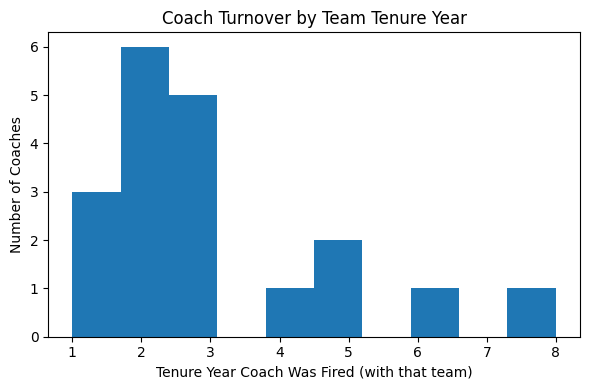

In [15]:
cd.coach_tenure()

As shown in the **histogram**, most coaches who experience **turnover** are in their **first**, **second**, or **third year** of tenure. This suggests that coaches with **less time** on a team are **more likely** to be affected by turnover.


###  **EDA Conclusions**

**Coaching success** is **predictable and stable**. The **inverse relationship** between **wins and losses** reflects **consistent performance**, with most coaches performing **near the average**.  

**Job security** is **performance-driven** — **coach turnover** is **rare** (*only $19/162$ coach-seasons*). There is a **strong negative correlation** between **win percentage** and **turnover**, meaning **higher win rates** lead to **greater job security**, while **poor performance** significantly **increases the risk of dismissal**.


In [16]:
sd.save_data(Path("../data"))